In [237]:
import pandas as pd
import numpy as np
import pickle
from scipy.io.arff import loadarff 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from IPython.display import display
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder

## Data preparation and data cleaning

In [238]:
raw_data = loadarff('phpkIxskf.arff')
df = pd.DataFrame(raw_data[0])
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,Class
0,58.0,b'management',b'married',b'tertiary',b'no',2143.0,b'yes',b'no',b'unknown',5.0,b'may',261.0,1.0,-1.0,0.0,b'unknown',b'1'
1,44.0,b'technician',b'single',b'secondary',b'no',29.0,b'yes',b'no',b'unknown',5.0,b'may',151.0,1.0,-1.0,0.0,b'unknown',b'1'
2,33.0,b'entrepreneur',b'married',b'secondary',b'no',2.0,b'yes',b'yes',b'unknown',5.0,b'may',76.0,1.0,-1.0,0.0,b'unknown',b'1'
3,47.0,b'blue-collar',b'married',b'unknown',b'no',1506.0,b'yes',b'no',b'unknown',5.0,b'may',92.0,1.0,-1.0,0.0,b'unknown',b'1'
4,33.0,b'unknown',b'single',b'unknown',b'no',1.0,b'no',b'no',b'unknown',5.0,b'may',198.0,1.0,-1.0,0.0,b'unknown',b'1'


In [239]:
df.columns = df.columns.str.lower()
df = df.rename(columns={
    "v1": "age",
    "v2": "job",
    "v3": "marital_status",
    "v4": "education",
    "v5": "credit_in_default",
    "v6": "average_balance",
    "v7": "has_housing_loan",
    "v8": "has_personal_loan",
    "v9": "contact_type",
    "v10": "day",
    "v11": "month",
    "v12": "duration",
    "v13": "number_contacts",
    "v14": "pdays",
    "v15": "number_contacts_before",
    "v16": "previous_outcome",
    "class": "target"})

In [240]:
for feat in ['job', 'marital_status', 'education', 'credit_in_default', 'has_housing_loan', 'has_personal_loan', 'contact_type', 'month', 'previous_outcome', 'target']:
    df[feat] = df[feat].str.decode('utf-8')

In [241]:
df.head()

,age,job,marital_status,education,credit_in_default,average_balance,has_housing_loan,has_personal_loan,contact_type,day,month,duration,number_contacts,pdays,number_contacts_before,previous_outcome,target
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,1
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,1
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,1
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,1
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,1


In [242]:
df['target'] = (df['target'] == '2').astype(int)

In [243]:
df['target'].nunique()

2

In [244]:
df['target'].unique()

array([0, 1])

In [245]:
df['target']

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: target, Length: 45211, dtype: int32

In [246]:
df.head()

,age,job,marital_status,education,credit_in_default,average_balance,has_housing_loan,has_personal_loan,contact_type,day,month,duration,number_contacts,pdays,number_contacts_before,previous_outcome,target
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,0
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,0
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,0
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,0
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,0


In [247]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [248]:
len(df_full_train), len(df_test)

(36168, 9043)

In [249]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [250]:
y_train = df_train['target'].values
y_val = df_val['target'].values
y_test = df_test['target'].values

In [251]:
del df_train['target']
del df_val['target']
del df_test['target']

In [252]:
df_train.head()

,age,job,marital_status,education,credit_in_default,average_balance,has_housing_loan,has_personal_loan,contact_type,day,month,duration,number_contacts,pdays,number_contacts_before,previous_outcome
0,56.0,entrepreneur,married,tertiary,no,40.0,no,yes,cellular,11.0,jul,123.0,2.0,-1.0,0.0,unknown
1,33.0,technician,married,secondary,no,4790.0,yes,no,cellular,20.0,apr,137.0,1.0,272.0,2.0,failure
2,32.0,technician,single,tertiary,no,392.0,yes,no,cellular,21.0,nov,148.0,2.0,-1.0,0.0,unknown
3,40.0,admin.,divorced,secondary,no,2129.0,no,no,cellular,30.0,apr,452.0,1.0,-1.0,0.0,unknown
4,54.0,unemployed,married,tertiary,no,1180.0,no,no,cellular,19.0,nov,394.0,2.0,-1.0,0.0,unknown


## Exploratory data analysis

In [253]:
df_full_train = df_full_train.reset_index(drop=True)
df_full_train

,age,job,marital_status,education,credit_in_default,average_balance,has_housing_loan,has_personal_loan,contact_type,day,month,duration,number_contacts,pdays,number_contacts_before,previous_outcome,target
0,52.0,management,married,tertiary,no,0.0,no,no,cellular,22.0,aug,232.0,2.0,-1.0,0.0,unknown,0
1,50.0,admin.,single,secondary,no,330.0,yes,no,unknown,28.0,may,24.0,1.0,-1.0,0.0,unknown,0
2,45.0,blue-collar,married,primary,no,300.0,yes,no,cellular,29.0,jan,203.0,1.0,261.0,3.0,failure,0
3,38.0,technician,married,secondary,no,27.0,yes,no,unknown,3.0,jun,404.0,4.0,-1.0,0.0,unknown,0
4,31.0,services,single,secondary,no,887.0,no,no,cellular,30.0,jan,427.0,1.0,-1.0,0.0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,50.0,technician,married,tertiary,no,1830.0,no,no,cellular,14.0,may,318.0,3.0,-1.0,0.0,unknown,0
36164,34.0,management,divorced,tertiary,no,528.0,yes,no,cellular,17.0,apr,233.0,2.0,-1.0,0.0,unknown,0
36165,48.0,management,married,tertiary,no,4191.0,no,no,unknown,21.0,may,363.0,6.0,-1.0,0.0,unknown,0
36166,45.0,admin.,married,unknown,no,1783.0,no,no,unknown,20.0,jun,11.0,11.0,-1.0,0.0,unknown,0


In [254]:
df_full_train.isnull().sum()

age                       0
job                       0
marital_status            0
education                 0
credit_in_default         0
average_balance           0
has_housing_loan          0
has_personal_loan         0
contact_type              0
day                       0
month                     0
duration                  0
number_contacts           0
pdays                     0
number_contacts_before    0
previous_outcome          0
target                    0
dtype: int64

In [255]:
df_full_train['target'].value_counts(normalize=True)

0    0.882797
1    0.117203
Name: target, dtype: float64

In [256]:
global_target = df_full_train['target'].mean()
global_target

0.11720305242203052

In [257]:
df_full_train.dtypes

age                       float64
job                        object
marital_status             object
education                  object
credit_in_default          object
average_balance           float64
has_housing_loan           object
has_personal_loan          object
contact_type               object
day                       float64
month                      object
duration                  float64
number_contacts           float64
pdays                     float64
number_contacts_before    float64
previous_outcome           object
target                      int32
dtype: object

In [258]:
numerical = ['age', 'average_balance', 'day', 'duration', 'number_contacts', 'pdays', 'number_contacts_before']

In [259]:
categorical = ['job', 'marital_status', 'education', 'credit_in_default', 'has_housing_loan', 'has_personal_loan', 'contact_type', 'month', 'previous_outcome']

In [260]:
for c in numerical:
    print('Description of', c)
    display(df_full_train[c].describe())
    print('#################')

Description of age


count    36168.000000
mean        40.933256
std         10.612074
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

#################
Description of average_balance


count     36168.000000
mean       1367.341462
std        3091.272985
min       -6847.000000
25%          73.000000
50%         450.000000
75%        1425.000000
max      102127.000000
Name: average_balance, dtype: float64

#################
Description of day


count    36168.000000
mean        15.801205
std          8.320342
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64

#################
Description of duration


count    36168.000000
mean       258.105480
std        257.877693
min          0.000000
25%        103.000000
50%        180.000000
75%        318.000000
max       4918.000000
Name: duration, dtype: float64

#################
Description of number_contacts


count    36168.000000
mean         2.776239
std          3.136934
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: number_contacts, dtype: float64

#################
Description of pdays


count    36168.000000
mean        39.980148
std         99.943625
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

#################
Description of number_contacts_before


count    36168.000000
mean         0.579988
std          2.391510
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: number_contacts_before, dtype: float64

#################


In [261]:
df_full_train[categorical].nunique()

job                  12
marital_status        3
education             4
credit_in_default     2
has_housing_loan      2
has_personal_loan     2
contact_type          3
month                12
previous_outcome      4
dtype: int64

## Feature importance analysis

In [262]:
for c in categorical:
    df_group = df_full_train.groupby(c).target.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_target
    df_group['risk'] = df_group['mean'] / global_target
    display(df_group)

,mean,count,diff,risk
job,,,,
admin.,0.122395,4175,0.005192,1.044301
blue-collar,0.073414,7805,-0.043789,0.626387
entrepreneur,0.082569,1199,-0.034634,0.704494
housemaid,0.090631,982,-0.026572,0.773285
management,0.138675,7550,0.021472,1.183207
retired,0.231323,1807,0.114120,1.973691
self-employed,0.112631,1243,-0.004572,0.960988
services,0.090122,3351,-0.027081,0.768942
student,0.291611,751,0.174408,2.488085


,mean,count,diff,risk
marital_status,,,,
divorced,0.119242,4168,0.002039,1.017395
married,0.101889,21710,-0.015315,0.869333
single,0.148688,10290,0.031485,1.268636


,mean,count,diff,risk
education,,,,
primary,0.087201,5516,-0.030002,0.744015
secondary,0.105671,18567,-0.011532,0.901609
tertiary,0.150042,10617,0.032839,1.280192
unknown,0.138283,1468,0.021080,1.179862


,mean,count,diff,risk
credit_in_default,,,,
no,0.118331,35519,0.001128,1.009624
yes,0.055470,649,-0.061733,0.473281


,mean,count,diff,risk
has_housing_loan,,,,
no,0.167124,16030,0.049921,1.425937
yes,0.077465,20138,-0.039738,0.660951


,mean,count,diff,risk
has_personal_loan,,,,
no,0.126759,30412,0.009556,1.081535
yes,0.066713,5756,-0.050490,0.569209


,mean,count,diff,risk
contact_type,,,,
cellular,0.148521,23458,0.031318,1.267209
telephone,0.135708,2358,0.018505,1.157890
unknown,0.042021,10352,-0.075182,0.358530


,mean,count,diff,risk
month,,,,
apr,0.193674,2308,0.076471,1.652467
aug,0.109776,4992,-0.007427,0.936628
dec,0.469880,166,0.352676,4.009106
feb,0.162048,2129,0.044845,1.382625
jan,0.095707,1118,-0.021496,0.816588
jul,0.090240,5574,-0.026963,0.769949
jun,0.106089,4270,-0.011114,0.905173
mar,0.528150,373,0.410947,4.506283
may,0.067389,10981,-0.049814,0.574978


,mean,count,diff,risk
previous_outcome,,,,
failure,0.126894,3893,0.009691,1.082689
other,0.162618,1482,0.045415,1.387490
success,0.646617,1197,0.529413,5.517062
unknown,0.092242,29596,-0.024961,0.787029


In [263]:
def mutual_info_target_score(series):
    return mutual_info_score(series, df_full_train.target)

In [264]:
mi = df_full_train[categorical].apply(mutual_info_target_score)
mi.sort_values(ascending=False)

previous_outcome     0.028893
month                0.024718
contact_type         0.013041
has_housing_loan     0.009551
job                  0.008437
has_personal_loan    0.002641
education            0.002564
marital_status       0.001980
credit_in_default    0.000407
dtype: float64

In [265]:
df_full_train[numerical].corrwith(df_full_train.target)

age                       0.024931
average_balance           0.055252
day                      -0.030624
duration                  0.398321
number_contacts          -0.072134
pdays                     0.101045
number_contacts_before    0.087392
dtype: float64

## Model training

In [266]:
dv = DictVectorizer(sparse=False)

In [267]:
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [268]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.fit_transform(val_dict)

### Logistic regression

In [271]:
for c in [0.01, 0.1, 0.5, 10]:
    model = LogisticRegression(max_iter=5000, C=c)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:, 1]
    decision = (y_pred >= 0.5)
    print('For c: ', c)
    print('accuracy: ', accuracy_score(y_val, decision))
    print('roc_auc_score: ', roc_auc_score(y_val, y_pred))
    print('###########')

For c:  0.01
accuracy:  0.8943817739438178
roc_auc_score:  0.8958225566213036
###########
For c:  0.1
accuracy:  0.8981420039814201
roc_auc_score:  0.9001686670078527
###########
For c:  0.5
accuracy:  0.8971466489714665
roc_auc_score:  0.9000605559499373
###########
For c:  10
accuracy:  0.8974784339747843
roc_auc_score:  0.8994709322268631
###########


### Decision tree

In [272]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [273]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    decision = (y_pred >= 0.5)
    accur = accuracy_score(y_val, decision)
    
    print('For depth: ', depth)
    print('accuracy: ', accur)
    print('roc_auc_score: ', auc)
    print('###########')

For depth:  1
accuracy:  0.8785666887856669
roc_auc_score:  0.6734546194949345
###########
For depth:  2
accuracy:  0.8887414288874143
roc_auc_score:  0.7435655003971334
###########
For depth:  3
accuracy:  0.8958195089581951
roc_auc_score:  0.7577667992890121
###########
For depth:  4
accuracy:  0.8952665339526653
roc_auc_score:  0.7695824895397106
###########
For depth:  5
accuracy:  0.8939393939393939
roc_auc_score:  0.8298344559457185
###########
For depth:  6
accuracy:  0.896040698960407
roc_auc_score:  0.8386467682704248
###########
For depth:  10
accuracy:  0.8918380889183809
roc_auc_score:  0.8188050070897008
###########
For depth:  15
accuracy:  0.887193098871931
roc_auc_score:  0.7254046196783679
###########
For depth:  20
accuracy:  0.8788984737889848
roc_auc_score:  0.6524503491654698
###########
For depth:  None
accuracy:  0.8754700287547003
roc_auc_score:  0.7105438204040304
###########


In [274]:
scores = []

for depth in [5, 10, 15]:
    for s in [1, 5, 10, 15, 20, 50, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [275]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [276]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth            5      10     15
min_samples_leaf                     
1                 0.830  0.812  0.725
5                 0.830  0.848  0.811
10                0.832  0.868  0.866
15                0.833  0.873  0.878
20                0.833  0.880  0.888
50                0.832  0.885  0.894
100               0.833  0.885  0.897
200               0.831  0.880  0.887

### Random forest

In [277]:
scores = []

for n in range(10, 301, 10):
    rf = RandomForestClassifier(n_estimators=n, n_jobs=-1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

In [278]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

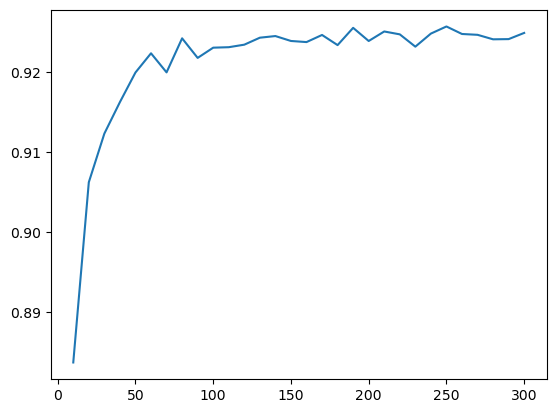

In [279]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [280]:
scores = []

for d in [5, 10, 15]:
    for n in range(150, 301, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [281]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

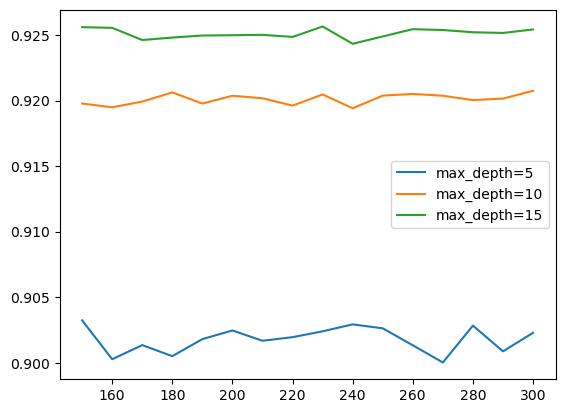

In [282]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

In [283]:
scores = []

for s in [1, 3, 5, 10, 50, 100, 200]:
    for n in range(250, 301, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=15,
                                    min_samples_leaf=s,
                                    n_jobs=-1
                                    )
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [284]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

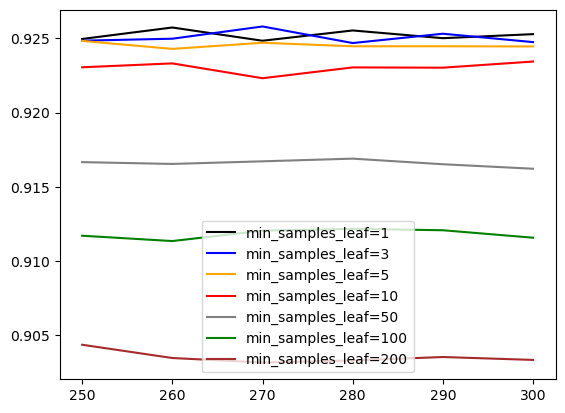

In [285]:
colors = ['black', 'blue', 'orange', 'red', 'grey', 'green', 'brown']
values = [1, 3, 5, 10, 50, 100, 200]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [286]:
rf = RandomForestClassifier(n_estimators=150,
                                    max_depth=15,
                                    min_samples_leaf=1,
                                    n_jobs=-1
                                    )
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
auc

0.9250949726409088

### Gradient boosting and XGBoost

In [287]:
!pip install xgboost

In [288]:
import xgboost as xgb

In [290]:
features = dv.get_feature_names_out()
features

array(['age', 'average_balance', 'contact_type=cellular',
       'contact_type=telephone', 'contact_type=unknown',
       'credit_in_default=no', 'credit_in_default=yes', 'day', 'duration',
       'education=primary', 'education=secondary', 'education=tertiary',
       'education=unknown', 'has_housing_loan=no', 'has_housing_loan=yes',
       'has_personal_loan=no', 'has_personal_loan=yes', 'job=admin.',
       'job=blue-collar', 'job=entrepreneur', 'job=housemaid',
       'job=management', 'job=retired', 'job=self-employed',
       'job=services', 'job=student', 'job=technician', 'job=unemployed',
       'job=unknown', 'marital_status=divorced', 'marital_status=married',
       'marital_status=single', 'month=apr', 'month=aug', 'month=dec',
       'month=feb', 'month=jan', 'month=jul', 'month=jun', 'month=mar',
       'month=may', 'month=nov', 'month=oct', 'month=sep',
       'number_contacts', 'number_contacts_before', 'pdays',
       'previous_outcome=failure', 'previous_outcome=oth

In [291]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=list(features))
dval = xgb.DMatrix(X_val, label=y_val, feature_names=list(features))

In [292]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [293]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [294]:
s = output.stdout

In [295]:
print(s)

[0]	train-auc:0.87877	val-auc:0.85513
[5]	train-auc:0.93261	val-auc:0.90501
[10]	train-auc:0.94274	val-auc:0.91424
[15]	train-auc:0.95190	val-auc:0.92215
[20]	train-auc:0.95847	val-auc:0.92570
[25]	train-auc:0.96269	val-auc:0.92763
[30]	train-auc:0.96580	val-auc:0.92897
[35]	train-auc:0.96738	val-auc:0.92887
[40]	train-auc:0.96947	val-auc:0.92897
[45]	train-auc:0.97209	val-auc:0.92923
[50]	train-auc:0.97371	val-auc:0.92891
[55]	train-auc:0.97544	val-auc:0.92879
[60]	train-auc:0.97718	val-auc:0.92889
[65]	train-auc:0.97897	val-auc:0.92865
[70]	train-auc:0.98014	val-auc:0.92815
[75]	train-auc:0.98179	val-auc:0.92790
[80]	train-auc:0.98342	val-auc:0.92795
[85]	train-auc:0.98522	val-auc:0.92778
[90]	train-auc:0.98628	val-auc:0.92734
[95]	train-auc:0.98757	val-auc:0.92728
[100]	train-auc:0.98878	val-auc:0.92702
[105]	train-auc:0.98938	val-auc:0.92687
[110]	train-auc:0.99006	val-auc:0.92661
[115]	train-auc:0.99055	val-auc:0.92656
[120]	train-auc:0.99096	val-auc:0.92662
[125]	train-auc:0.9915

In [296]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [297]:
df_score = parse_xgb_output(output)

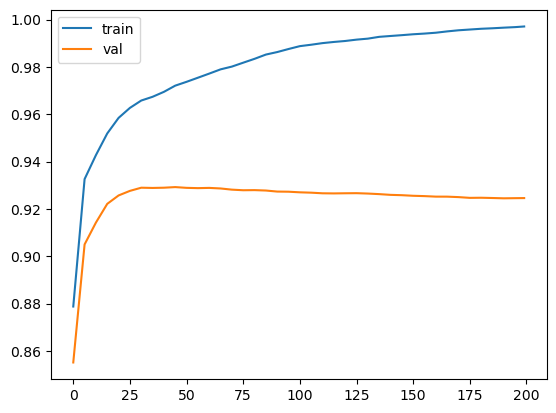

In [298]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

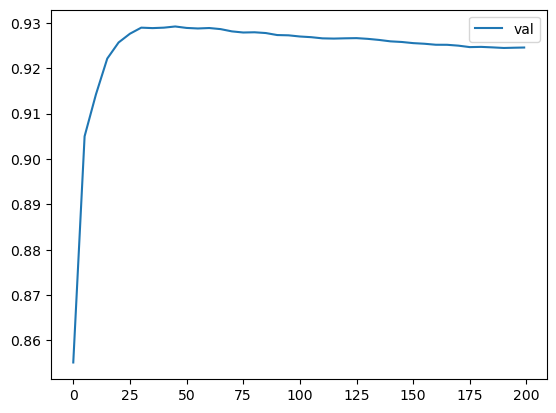

In [299]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

In [300]:
scores = {}

In [301]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 5,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [302]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.1'

In [303]:
scores.keys()

dict_keys(['eta=0.1'])

> **_NOTE:_** In order to see more than one line, you need to manually change 'eta' in xgb_params and run the code in the subsequent cells. By doing this you will add an additional key to your scores dictionary.

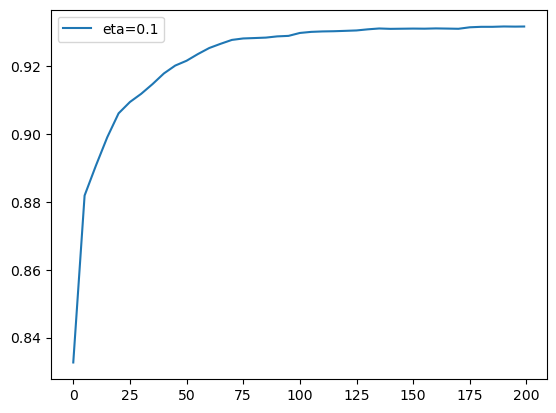

In [304]:
for eta, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)

plt.legend()

In [305]:
scores = {}

In [306]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 5,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [307]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=5'

In [308]:
scores.keys()

dict_keys(['max_depth=5'])

> **_NOTE:_** In order to see more than one line, you need to manually change 'max_depth' in xgb_params and run the code in the subsequent cells. By doing this you will add an additional key to your scores dictionary.

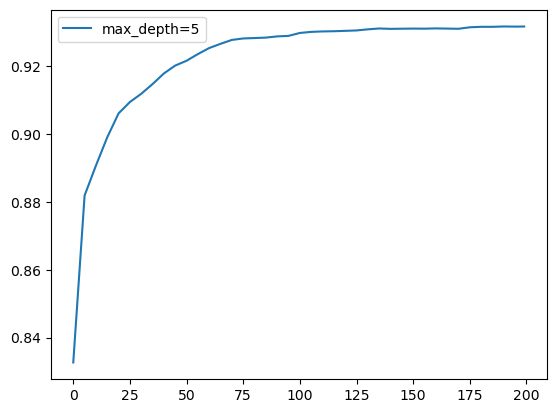

In [309]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

plt.legend()

In [310]:
scores = {}

In [311]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 5,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [312]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=1'

In [313]:
scores.keys()

dict_keys(['min_child_weight=1'])

> **_NOTE:_** In order to see more than one line, you need to manually change 'min_child_weight' in xgb_params and run the code in the subsequent cells. By doing this you will add an additional key to your scores dictionary.

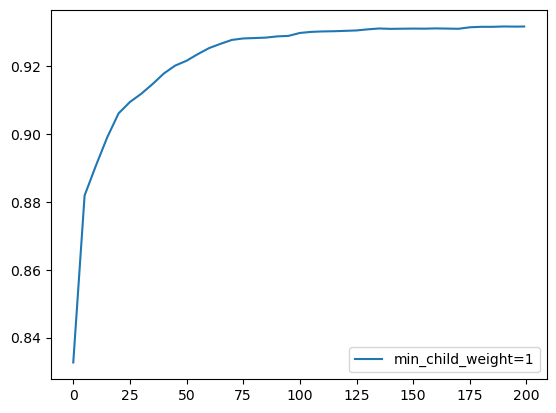

In [314]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)

plt.legend()

### Selecting the final model

In [316]:
lg = LogisticRegression(max_iter=5000, C=0.1)
lg.fit(X_train, y_train)
y_pred = lg.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.9001686670078527

In [317]:
dt = DecisionTreeClassifier(max_depth=15, min_samples_leaf=100)
dt.fit(X_train, y_train)
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8965595576136782

In [318]:
rf = RandomForestClassifier(n_estimators=250, max_depth=15, min_samples_leaf=1, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.9253687469848135

In [319]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 5,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'seed': 1,
    'verbosity': 1,
}

xgb_model = xgb.train(xgb_params, dtrain, num_boost_round=200)
y_pred = xgb_model.predict(dval)
roc_auc_score(y_val, y_pred)

0.9316789704617202

### Training the XGB model on the full data set

In [320]:
y_full_train = df_full_train.target.values

In [321]:
del df_full_train['target']

In [322]:
full_train_dict = df_full_train.to_dict(orient='records')
X_full_train = dv.fit_transform(full_train_dict)

In [323]:
test_dict = df_test.to_dict(orient='records')
X_test = dv.fit_transform(test_dict)

In [324]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=list(features))
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=list(features))

In [325]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 5,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'seed': 1,
    'verbosity': 1,
}

xgb_model = xgb.train(xgb_params, dfulltrain, num_boost_round=200)
y_pred = xgb_model.predict(dtest)
roc_auc_score(y_test, y_pred)

0.9359310825543781

### Training the Logistic regression model on the full data set

In [328]:
model = LogisticRegression(max_iter=5000, C=0.1)
model.fit(X_full_train, y_full_train)
y_pred = model.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred)

0.9075726975389178

### Save the model

In [329]:
output_file = 'model.bin'

In [330]:
with open(output_file, 'wb') as f_out:
    pickle.dump((dv, model), f_out)

In [331]:
with open(output_file, 'rb') as f_in:
    (dv, model) = pickle.load(f_in)

In [332]:
dv, model

(DictVectorizer(sparse=False), LogisticRegression(C=0.1, max_iter=5000))

In [333]:
df[df['target'] == 1]

,age,job,marital_status,education,credit_in_default,average_balance,has_housing_loan,has_personal_loan,contact_type,day,month,duration,number_contacts,pdays,number_contacts_before,previous_outcome,target
83,59.0,admin.,married,secondary,no,2343.0,yes,no,unknown,5.0,may,1042.0,1.0,-1.0,0.0,unknown,1
86,56.0,admin.,married,secondary,no,45.0,no,no,unknown,5.0,may,1467.0,1.0,-1.0,0.0,unknown,1
87,41.0,technician,married,secondary,no,1270.0,yes,no,unknown,5.0,may,1389.0,1.0,-1.0,0.0,unknown,1
129,55.0,services,married,secondary,no,2476.0,yes,no,unknown,5.0,may,579.0,1.0,-1.0,0.0,unknown,1
168,54.0,admin.,married,tertiary,no,184.0,no,no,unknown,5.0,may,673.0,2.0,-1.0,0.0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73.0,retired,married,secondary,no,2850.0,no,no,cellular,17.0,nov,300.0,1.0,40.0,8.0,failure,1
45205,25.0,technician,single,secondary,no,505.0,no,yes,cellular,17.0,nov,386.0,2.0,-1.0,0.0,unknown,1
45206,51.0,technician,married,tertiary,no,825.0,no,no,cellular,17.0,nov,977.0,3.0,-1.0,0.0,unknown,1
45207,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,17.0,nov,456.0,2.0,-1.0,0.0,unknown,1


In [343]:
client = df.loc[83].to_dict()
del client['target']
client

{'age': 59.0,
 'job': 'admin.',
 'marital_status': 'married',
 'education': 'secondary',
 'credit_in_default': 'no',
 'average_balance': 2343.0,
 'has_housing_loan': 'yes',
 'has_personal_loan': 'no',
 'contact_type': 'unknown',
 'day': 5.0,
 'month': 'may',
 'duration': 1042.0,
 'number_contacts': 1.0,
 'pdays': -1.0,
 'number_contacts_before': 0.0,
 'previous_outcome': 'unknown'}

In [344]:
X_client = dv.transform([client])
X_client

array([[ 5.900e+01,  2.343e+03,  0.000e+00,  0.000e+00,  1.000e+00,
         1.000e+00,  0.000e+00,  5.000e+00,  1.042e+03,  0.000e+00,
         1.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  1.000e+00,
         1.000e+00,  0.000e+00,  1.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         1.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         1.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  1.000e+00,
         0.000e+00, -1.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         1.000e+00]])

In [347]:
model.predict_proba(X_client)[0,1]

0.30547185739148824